## Introduction 

In this project we will try to learn how to work with RNNs in Keras. We will mostly follow Chapter 15 of Aurelion Geron's book on Machine Leraning (2nd Ed.). Note that we had already learnt how to use RNNs in pytorch through Udacity's course on  Introduction to Deep Learning with PyTorch. Our aim here will be to do the same in Keras. 

## Generating train and test sequences 

We will use a simple sine wave to produce our sequences

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
time_steps=np.arange(0, 5002*np.pi, np.pi/100 )
time_steps

array([0.00000000e+00, 3.14159265e-02, 6.28318531e-02, ...,
       1.57141522e+04, 1.57141836e+04, 1.57142150e+04])

In [4]:
series = np.sin(time_steps).reshape(-1,1)
series

array([[ 0.        ],
       [ 0.03141076],
       [ 0.06279052],
       ...,
       [-0.09410831],
       [-0.06279052],
       [-0.03141076]])

In [5]:
series.shape

(500200, 1)

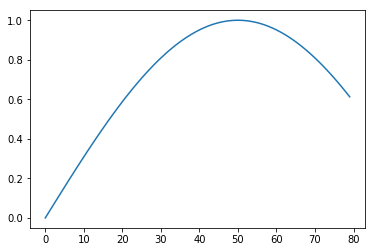

In [6]:
plt.plot(series[:80])
plt.show()

We now wish to convert this into 50 batches. Each consisting of 20 sequences with each sequence consisting of 50 time steps. For this we will first reshape our data to be a 2d array with 20 rows, then we will use a sliding window of size 50 to divide the sequence into batches

In [7]:
series.size

500200

In [8]:
series=series.reshape(20,-1,1)
series.shape

(20, 25010, 1)

In [9]:
# the column index at which each new batch starts
start_idx=np.arange(0,2500,50)
start_idx

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450])

In [10]:
start_idx.size

50

In [11]:
# extracting the input sequences
x_batches=[]
for idx in start_idx:
    batch=series[:, idx: idx+50, :]
    x_batches.append(batch)

In [12]:
# checking that all the batches have the correct shape
ctr=1
for batch in x_batches:
    print("batch: {} shape: {}".format(ctr, batch.shape))
    ctr+=1  

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

In [13]:
# extracting the output sequences
# these are same as input sequences shifted by 1 time_step
y_batches=[]
for idx in start_idx:
    batch=series[:,idx+1:idx+51,:]
    y_batches.append(batch)

In [14]:
# making sure all the y_batches have the correct shape
ctr=1
for batch in y_batches:
    print('batch: {} shape: {}'.format(ctr, batch.shape))
    ctr+=1

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

Next, we will compare the input and the output of a random sequence

In [15]:
x=x_batches[23][5]
x[:6]

array([[2.64669788e-13],
       [3.14107591e-02],
       [6.27905195e-02],
       [9.41083133e-02],
       [1.25333234e-01],
       [1.56434465e-01]])

In [16]:
y=y_batches[23][5]
y[:5]

array([[0.03141076],
       [0.06279052],
       [0.09410831],
       [0.12533323],
       [0.15643447]])

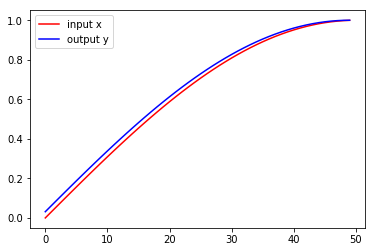

In [17]:
plt.plot(x, 'r', label='input x')
plt.plot(y, 'b', label='output y')
plt.legend()
plt.show()

We see that indeed the sequence in y is shifted from that in x by a single time step. 

## Split into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train_size = 70%
seed = 42
train_size = 0.7
X_train, X_val, y_train, y_val = train_test_split(x_batches, y_batches, train_size=train_size, random_state=True )

C:\Users\agarw\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
# validation size = 15% of the total data
# this is equivalent to 50% of the remaining sequences after extracting the training data
val_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=val_size, random_state=True )

In [21]:
# number of batches in training and test sequences
print('num x_batches_train: {}'.format(len(X_train)))
print('num y_batches_train: {}'.format(len(y_train)))
print('num x_batches_val: {}'.format(len(X_val)))
print('num y_batches_val: {}'.format(len(y_val)))
print('num x_batches_test: {}'.format(len(X_test)))
print('num y_batches_test: {}'.format(len(y_test)))

num x_batches_train: 35
num y_batches_train: 35
num x_batches_val: 7
num y_batches_val: 7
num x_batches_test: 8
num y_batches_test: 8


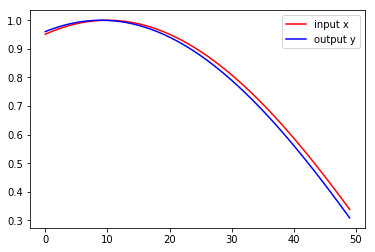

In [22]:
# compare the input and the output sequences of a random sequence in training batches
x = X_train[17][14]
y = y_train[17][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

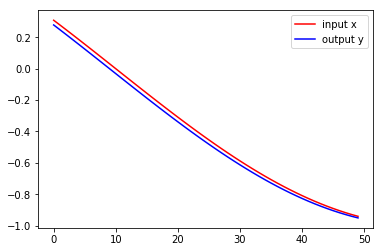

In [23]:
# compare the input and the output sequences of a random sequence in validation batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

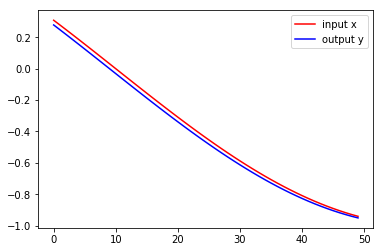

In [24]:
# compare the input and the output sequences of a random sequence in test batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

## Building a single neuron simple RNN

Having prepared our data, let us now import and train the Simple RNN provided by keras on these sequences. The relevant documentation for SimpleRNN can be found [here](https://keras.io/layers/recurrent/).

In [25]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [26]:
# A 1 layer RNN with a single neuron
# if we wish to get the output of each time_step, we must set
# return_sequences=True 
# the sequence can be of any length => input shape is [None, 1]
# since this is a simple RNN with just 1 neuron, it will be unfair to be able to learn to correctly predict the output for each time_step
# therefore for now will only predict the expected value at the end of the sequence
simpleRNN = Sequential([SimpleRNN(units = 1, input_shape= [None, 1], 
                                  return_sequences = False)] )

Instructions for updating:
Colocations handled automatically by placer.


### compile, fit and evaluate the model

In [27]:
optimizer='adam'
simpleRNN.compile(optimizer = optimizer, loss = 'mse')

In [28]:
# let's check the output of the simpleRNN on a single sequence before training
y_pred=simpleRNN.predict(X_train[17][14].reshape(1,50,1))

In [29]:
y_pred.shape

(1, 1)

I just realized that I did not need to split my data into batches and can just pass the batch_size to model.fit() in keras

In [30]:
# joining all the batches in X_train
X_train=np.array(X_train).reshape(-1,50,1)
X_train.shape

(700, 50, 1)

In [31]:
# joining all the batches in y_train
y_train = np.array(y_train).reshape(-1,50,1)
y_train.shape

(700, 50, 1)

In [32]:
# extracting the last value in the prediction sequence
y_true_train=y_train[:,-1]
y_true_train.shape

(700, 1)

In [33]:
# joining all the validation batches
X_val = np.array(X_val).reshape(-1,50,1)
y_val = np.array(y_val).reshape(-1,50,1)
print('X_val shape: {}, y_val_shape: {}'.format(X_val.shape, y_val.shape))

X_val shape: (140, 50, 1), y_val_shape: (140, 50, 1)


In [34]:
# extracting the expected value at the end of each validation sequence
y_true_val=y_val[:,-1]
y_true_val.shape

(140, 1)

In [35]:
# joining all the test sequences
X_test=np.array(X_test).reshape(-1, 50,1)
y_test=np.array(y_test).reshape(-1,50,1)
print('X_test shape: {}, y_test shape: {}'.format(X_test.shape, y_test.shape))

X_test shape: (160, 50, 1), y_test shape: (160, 50, 1)


In [36]:
# extracting the expected value at the end of each test sequence
y_true_test=y_test[:,-1]
y_true_test.shape

(160, 1)

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
# early stopper to stop training if val_loss does not improve over a certain period of training

patience = 20 # training should stop if val_loss does not improve for this many epochs
min_delta = 0.01 # val_loss should improve by atleast this much for training to not stop 
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True)


In [39]:
# training the model
epochs=200
verbose = 1

simpleRNN.fit(X_train, y_true_train, epochs=epochs, batch_size=20, verbose = verbose,
              callbacks = [stopper], validation_data = (X_val, y_true_val))

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 140 samples
Epoch 1/200
700/700 [==============================] - 1s 1ms/step - loss: 0.7453 - val_loss: 0.7281
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.7166 - val_loss: 0.7052
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6950 - val_loss: 0.6844
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6744 - val_loss: 0.6640
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6543 - val_loss: 0.6440
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6346 - val_loss: 0.6243
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.6152 - val_loss: 0.6054
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.5964 - val_loss: 0.5868
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.5780 - val_loss: 0.56

In [40]:
# predictions on the test set
y_test_pred = simpleRNN.predict(X_test)
y_test_pred.shape

(160, 1)

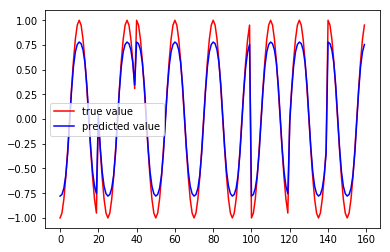

In [41]:
# compare y_true_test and y_test_pred
plt.plot(y_true_test, 'r', label = 'true value')
plt.plot(y_test_pred, 'b', label = 'predicted value')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
# mse of the test prediction
test_loss = mse(y_true_test, y_test_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.01580986562754157


This was pretty good! 

### let's try predicting all the timesteps in a sequence

In [55]:
simpleRNN2 = Sequential([SimpleRNN(units=1 ,input_shape=[None, 1], return_sequences=True)])

In [56]:
optimizer = 'adam'
simpleRNN2.compile(optimizer = optimizer, loss = 'mse' )

In [57]:
patience = 30
min_delta = 0.01

stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True )

In [58]:
verbose = 1
epochs = 300
simpleRNN2.fit(X_train, y_train, batch_size = 50,  epochs = epochs, callbacks = [stopper], 
               verbose = verbose, validation_data = (X_val, y_val))

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 1s 1ms/step - loss: 1.2599 - val_loss: 1.2524
Epoch 2/300
700/700 [==============================] - 0s 493us/step - loss: 1.2464 - val_loss: 1.2395
Epoch 3/300
700/700 [==============================] - 0s 413us/step - loss: 1.2341 - val_loss: 1.2277
Epoch 4/300
700/700 [==============================] - 0s 429us/step - loss: 1.2228 - val_loss: 1.2173
Epoch 5/300
700/700 [==============================] - 0s 429us/step - loss: 1.2129 - val_loss: 1.2078
Epoch 6/300
700/700 [==============================] - 0s 454us/step - loss: 1.2037 - val_loss: 1.1989
Epoch 7/300
700/700 [==============================] - 0s 433us/step - loss: 1.1949 - val_loss: 1.1903
Epoch 8/300
700/700 [==============================] - 0s 422us/step - loss: 1.1863 - val_loss: 1.1817
Epoch 9/300
700/700 [==============================] - 0s 417us/step - loss: 1.1776 - val_loss: 1.1730
Epoch 10/300
700/700 [=======

700/700 [==============================] - 0s 486us/step - loss: 0.5863 - val_loss: 0.5824
Epoch 80/300
700/700 [==============================] - 1s 742us/step - loss: 0.5791 - val_loss: 0.5753
Epoch 81/300
700/700 [==============================] - 0s 600us/step - loss: 0.5721 - val_loss: 0.5682
Epoch 82/300
700/700 [==============================] - 0s 507us/step - loss: 0.5650 - val_loss: 0.5613
Epoch 83/300
700/700 [==============================] - 0s 489us/step - loss: 0.5581 - val_loss: 0.5544
Epoch 84/300
700/700 [==============================] - 0s 436us/step - loss: 0.5512 - val_loss: 0.5476
Epoch 85/300
700/700 [==============================] - 0s 440us/step - loss: 0.5445 - val_loss: 0.5408
Epoch 86/300
700/700 [==============================] - 0s 507us/step - loss: 0.5378 - val_loss: 0.5342
Epoch 87/300
700/700 [==============================] - 0s 422us/step - loss: 0.5312 - val_loss: 0.5276
Epoch 88/300
700/700 [==============================] - 0s 432us/step - loss:

700/700 [==============================] - 0s 563us/step - loss: 0.0332 - val_loss: 0.0318
Epoch 158/300
700/700 [==============================] - 0s 513us/step - loss: 0.0307 - val_loss: 0.0295
Epoch 159/300
700/700 [==============================] - 0s 499us/step - loss: 0.0285 - val_loss: 0.0274
Epoch 160/300
700/700 [==============================] - 0s 486us/step - loss: 0.0265 - val_loss: 0.0255
Epoch 161/300
700/700 [==============================] - 0s 500us/step - loss: 0.0247 - val_loss: 0.0238
Epoch 162/300
700/700 [==============================] - 0s 489us/step - loss: 0.0231 - val_loss: 0.0224
Epoch 163/300
700/700 [==============================] - 0s 492us/step - loss: 0.0218 - val_loss: 0.0211
Epoch 164/300
700/700 [==============================] - 0s 456us/step - loss: 0.0206 - val_loss: 0.0200
Epoch 165/300
700/700 [==============================] - 0s 463us/step - loss: 0.0195 - val_loss: 0.0190
Epoch 166/300
700/700 [==============================] - 0s 484us/ste

In [60]:
# test predictions 
y_test_pred = simpleRNN2.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [61]:
s_pred = y_test_pred.reshape(-1,1)
s_true = y_test.reshape(-1,1)
print('prediction shape: {}, true shape: {}'.format(s_pred.shape, s_true.shape))

prediction shape: (8000, 1), true shape: (8000, 1)


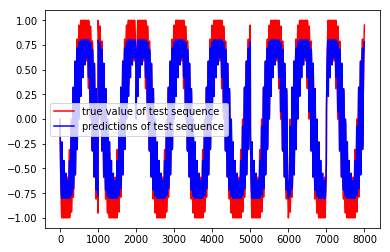

In [63]:
plt.plot(s_true, 'r', label = 'true value of test sequence')
plt.plot(s_pred, 'b', label = 'predictions of test sequence')
plt.legend()
plt.show()

In [64]:
error = mse(s_true, s_pred)
print('test error is: {}'.format(error))

test error is: 0.013673788525691009


Not bad! 

## Simple RNN with multiple units 

In [92]:
# The final output has to be a single number per time-step 
# Just creating a single layer of simpleRNN with n units will produce an n-dimensional vector per time step
# we need to change this into a single number
# one way to do this is pass it through a Dense layer consisting of a single neuron 
# another way is that instead we pass it through another layer of SimpleRNN with just a single neuron
# let's try the latter first
# also, note that our sequence contains negative values but relu only allows postive values to pass through
# thus relu is not a good activation function for the output neuron
simpleRNN3 = Sequential([SimpleRNN(units = 20, activation = 'relu', input_shape= [None, 1] , return_sequences = True), 
                         SimpleRNN(units = 1 , activation = 'tanh', return_sequences = True)])

In [93]:
optimizer = 'adam'
simpleRNN3.compile(optimizer = optimizer, loss = 'mae')

In [94]:
# early stopping 
patience = 30
min_delta = 0.001
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True )

In [95]:
epochs = 500
verbose = 1
simpleRNN3.fit(X_train, y_train, batch_size = 100, epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data=(X_val, y_val) )

Train on 700 samples, validate on 140 samples
Epoch 1/500
700/700 [==============================] - 2s 2ms/step - loss: 0.4548 - val_loss: 0.2516
Epoch 2/500
700/700 [==============================] - 0s 422us/step - loss: 0.2364 - val_loss: 0.2258
Epoch 3/500
700/700 [==============================] - 0s 416us/step - loss: 0.2210 - val_loss: 0.2151
Epoch 4/500
700/700 [==============================] - 0s 410us/step - loss: 0.2109 - val_loss: 0.2058
Epoch 5/500
700/700 [==============================] - 0s 445us/step - loss: 0.2030 - val_loss: 0.1995
Epoch 6/500
700/700 [==============================] - 0s 413us/step - loss: 0.1971 - val_loss: 0.1942
Epoch 7/500
700/700 [==============================] - 0s 423us/step - loss: 0.1921 - val_loss: 0.1893
Epoch 8/500
700/700 [==============================] - 0s 432us/step - loss: 0.1874 - val_loss: 0.1847
Epoch 9/500
700/700 [==============================] - 0s 427us/step - loss: 0.1827 - val_loss: 0.1800
Epoch 10/500
700/700 [=======

700/700 [==============================] - 0s 469us/step - loss: 0.0362 - val_loss: 0.0355
Epoch 80/500
700/700 [==============================] - 0s 442us/step - loss: 0.0369 - val_loss: 0.0346
Epoch 81/500
700/700 [==============================] - 0s 415us/step - loss: 0.0365 - val_loss: 0.0349
Epoch 82/500
700/700 [==============================] - 0s 578us/step - loss: 0.0344 - val_loss: 0.0341
Epoch 83/500
700/700 [==============================] - 0s 454us/step - loss: 0.0341 - val_loss: 0.0345
Epoch 84/500
700/700 [==============================] - 0s 506us/step - loss: 0.0345 - val_loss: 0.0348
Epoch 85/500
700/700 [==============================] - 0s 466us/step - loss: 0.0345 - val_loss: 0.0347
Epoch 86/500
700/700 [==============================] - 0s 477us/step - loss: 0.0346 - val_loss: 0.0338
Epoch 87/500
700/700 [==============================] - 0s 443us/step - loss: 0.0340 - val_loss: 0.0333
Epoch 88/500
700/700 [==============================] - 0s 463us/step - loss:

700/700 [==============================] - 0s 496us/step - loss: 0.0259 - val_loss: 0.0264
Epoch 158/500
700/700 [==============================] - 0s 432us/step - loss: 0.0250 - val_loss: 0.0239
Epoch 159/500
700/700 [==============================] - 0s 432us/step - loss: 0.0243 - val_loss: 0.0242
Epoch 160/500
700/700 [==============================] - 0s 446us/step - loss: 0.0242 - val_loss: 0.0242
Epoch 161/500
700/700 [==============================] - 0s 473us/step - loss: 0.0238 - val_loss: 0.0235
Epoch 162/500
700/700 [==============================] - 0s 446us/step - loss: 0.0236 - val_loss: 0.0233
Epoch 163/500
700/700 [==============================] - 0s 504us/step - loss: 0.0233 - val_loss: 0.0236
Epoch 164/500
700/700 [==============================] - 0s 482us/step - loss: 0.0233 - val_loss: 0.0230
Epoch 165/500
700/700 [==============================] - 0s 503us/step - loss: 0.0232 - val_loss: 0.0229
Epoch 166/500
700/700 [==============================] - 0s 493us/ste

700/700 [==============================] - 0s 446us/step - loss: 0.0190 - val_loss: 0.0186
Epoch 236/500
700/700 [==============================] - 0s 447us/step - loss: 0.0192 - val_loss: 0.0186
Epoch 237/500
700/700 [==============================] - 0s 425us/step - loss: 0.0189 - val_loss: 0.0184
Epoch 238/500
700/700 [==============================] - 0s 440us/step - loss: 0.0185 - val_loss: 0.0185
Epoch 239/500
700/700 [==============================] - 0s 456us/step - loss: 0.0186 - val_loss: 0.0186
Epoch 240/500
700/700 [==============================] - 0s 443us/step - loss: 0.0184 - val_loss: 0.0183
Epoch 241/500
700/700 [==============================] - 0s 446us/step - loss: 0.0184 - val_loss: 0.0181
Epoch 242/500
700/700 [==============================] - 0s 453us/step - loss: 0.0182 - val_loss: 0.0181
Epoch 243/500
700/700 [==============================] - 0s 430us/step - loss: 0.0182 - val_loss: 0.0180
Epoch 244/500
700/700 [==============================] - 0s 509us/ste

700/700 [==============================] - 0s 470us/step - loss: 0.0182 - val_loss: 0.0180
Epoch 314/500
700/700 [==============================] - 0s 466us/step - loss: 0.0166 - val_loss: 0.0163
Epoch 315/500
700/700 [==============================] - 0s 446us/step - loss: 0.0168 - val_loss: 0.0180
Epoch 316/500
700/700 [==============================] - 0s 477us/step - loss: 0.0170 - val_loss: 0.0160
Epoch 317/500
700/700 [==============================] - 0s 417us/step - loss: 0.0159 - val_loss: 0.0153
Epoch 318/500
700/700 [==============================] - 0s 473us/step - loss: 0.0155 - val_loss: 0.0155
Epoch 319/500
700/700 [==============================] - 0s 449us/step - loss: 0.0153 - val_loss: 0.0151
Epoch 320/500
700/700 [==============================] - 0s 429us/step - loss: 0.0155 - val_loss: 0.0154
Epoch 321/500
700/700 [==============================] - 0s 419us/step - loss: 0.0155 - val_loss: 0.0158
Epoch 322/500
700/700 [==============================] - 0s 477us/ste

In [96]:
y_test_pred = simpleRNN3.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [97]:
s_true = y_test.reshape(-1,1)
s_pred = y_test_pred.reshape(-1,1)

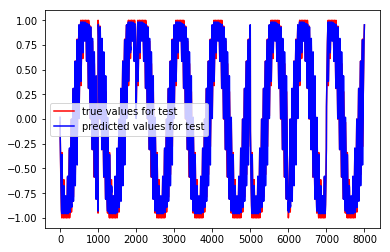

In [99]:
plt.plot(s_true, 'r', label = 'true values for test')
plt.plot(s_pred, 'b', label = 'predicted values for test')
plt.legend()
plt.show()

In [101]:
test_loss = mse(s_true, s_pred)
print('test loss is: {}'.format(test_loss))

test loss is: 0.0007568573827404457


very nice!

## Simple RNN with multiple units and Dense layer for output

In [115]:
from keras.layers import Dense

In [116]:
simpleRNN4 = Sequential([SimpleRNN(input_shape = [None, 1], units = 20, activation = 'relu', return_sequences = True), 
                        Dense(units = 1)])

In [117]:
optimizer = 'adam'
simpleRNN4.compile(optimizer = optimizer, loss = 'mae')

In [118]:
patience = 300
min_delta = 0.001
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience , restore_best_weights = True)

In [120]:
epochs = 300
verbose = 1
simpleRNN4.fit(X_train, y_train, batch_size = 100,  epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data = (X_val, y_val) )

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 1s 2ms/step - loss: 0.2150 - val_loss: 0.1669
Epoch 2/300
700/700 [==============================] - 0s 238us/step - loss: 0.1411 - val_loss: 0.1218
Epoch 3/300
700/700 [==============================] - 0s 249us/step - loss: 0.1072 - val_loss: 0.0855
Epoch 4/300
700/700 [==============================] - 0s 269us/step - loss: 0.0727 - val_loss: 0.0567
Epoch 5/300
700/700 [==============================] - 0s 225us/step - loss: 0.0441 - val_loss: 0.0344
Epoch 6/300
700/700 [==============================] - 0s 224us/step - loss: 0.0348 - val_loss: 0.0334
Epoch 7/300
700/700 [==============================] - 0s 224us/step - loss: 0.0298 - val_loss: 0.0273
Epoch 8/300
700/700 [==============================] - 0s 221us/step - loss: 0.0262 - val_loss: 0.0238
Epoch 9/300
700/700 [==============================] - 0s 215us/step - loss: 0.0219 - val_loss: 0.0203
Epoch 10/300
700/700 [=======

700/700 [==============================] - 0s 289us/step - loss: 0.0048 - val_loss: 0.0082
Epoch 80/300
700/700 [==============================] - 0s 237us/step - loss: 0.0064 - val_loss: 0.0054
Epoch 81/300
700/700 [==============================] - 0s 221us/step - loss: 0.0062 - val_loss: 0.0027
Epoch 82/300
700/700 [==============================] - 0s 275us/step - loss: 0.0059 - val_loss: 0.0072
Epoch 83/300
700/700 [==============================] - 0s 249us/step - loss: 0.0042 - val_loss: 0.0046
Epoch 84/300
700/700 [==============================] - 0s 221us/step - loss: 0.0051 - val_loss: 0.0047
Epoch 85/300
700/700 [==============================] - 0s 268us/step - loss: 0.0040 - val_loss: 0.0064
Epoch 86/300
700/700 [==============================] - 0s 303us/step - loss: 0.0054 - val_loss: 0.0045
Epoch 87/300
700/700 [==============================] - 0s 251us/step - loss: 0.0044 - val_loss: 0.0036
Epoch 88/300
700/700 [==============================] - 0s 269us/step - loss:

700/700 [==============================] - 0s 237us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 158/300
700/700 [==============================] - 0s 296us/step - loss: 0.0030 - val_loss: 0.0032
Epoch 159/300
700/700 [==============================] - 0s 256us/step - loss: 0.0029 - val_loss: 0.0018
Epoch 160/300
700/700 [==============================] - 0s 225us/step - loss: 0.0021 - val_loss: 0.0041
Epoch 161/300
700/700 [==============================] - 0s 231us/step - loss: 0.0039 - val_loss: 0.0052
Epoch 162/300
700/700 [==============================] - 0s 279us/step - loss: 0.0043 - val_loss: 0.0041
Epoch 163/300
700/700 [==============================] - 0s 225us/step - loss: 0.0038 - val_loss: 0.0045
Epoch 164/300
700/700 [==============================] - 0s 228us/step - loss: 0.0037 - val_loss: 0.0025
Epoch 165/300
700/700 [==============================] - 0s 219us/step - loss: 0.0029 - val_loss: 0.0030
Epoch 166/300
700/700 [==============================] - 0s 219us/ste

Epoch 235/300
700/700 [==============================] - 0s 285us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 236/300
700/700 [==============================] - 0s 281us/step - loss: 0.0021 - val_loss: 0.0024
Epoch 237/300
700/700 [==============================] - 0s 221us/step - loss: 0.0024 - val_loss: 0.0027
Epoch 238/300
700/700 [==============================] - 0s 225us/step - loss: 0.0019 - val_loss: 0.0020
Epoch 239/300
700/700 [==============================] - 0s 302us/step - loss: 0.0021 - val_loss: 0.0021
Epoch 240/300
700/700 [==============================] - 0s 234us/step - loss: 0.0022 - val_loss: 0.0022
Epoch 241/300
700/700 [==============================] - 0s 222us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 242/300
700/700 [==============================] - 0s 218us/step - loss: 0.0030 - val_loss: 0.0037
Epoch 243/300
700/700 [==============================] - 0s 264us/step - loss: 0.0028 - val_loss: 0.0025
Epoch 244/300
700/700 [==============================] 

In [122]:
y_test_pred = simpleRNN4.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [123]:
s_true = y_test.reshape(-1,1)
s_pred = y_test_pred.reshape(-1,1)

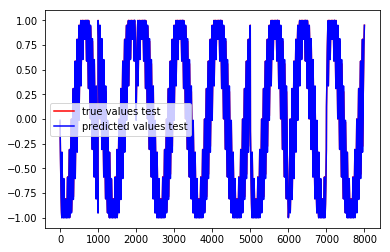

In [124]:
plt.plot(s_true, 'r', label = 'true values test')
plt.plot(s_pred, 'b', label = 'predicted values test')
plt.legend()
plt.show()

the predicted value seems to overlap with the true values perfectly!

In [125]:
test_loss = mse(s_true, s_pred)
print('test loss: {}'.format(test_loss))

test loss: 2.4166444636128296e-05


This is an extremely low error! Wow!